<a href="https://colab.research.google.com/github/DrabberSP/Entregable-2/blob/main/FinalMicroretailer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Instalamos libreria
%pip install funpymodeling

In [ ]:
# Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
# Cargar archivo .xlsx desde equipo
MRetailer=pd.read_excel('microretailer_mit_lift_lab.xlsx')

In [ ]:
# Obtenemos información del archivo
MRetailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Columns: 106 entries, _record_id to 235_email
dtypes: float64(20), int64(2), object(84)
memory usage: 367.8+ KB


In [ ]:
# Identificar valores nulos por columna
valores_nulos=MRetailer.isnull().sum()
valores_nulos

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop    166
318_shopkeeper_name                     337
319_shopkeepers_last_name               341
236_whatsapp                            345
235_email                               387
Length: 106, dtype: int64

Reemplazamos valores nulos

In [ ]:
# Realizamos una copia del dataframe
Retailers_Nulos=MRetailer.copy()
# Reemplazamos valores nulos
Retailers_Nulos=Retailers_Nulos.fillna(method='bfill')
Retailers_Nulos

In [ ]:
# Identificar valores nulos de todo el dataframe
valores_nulos=Retailers_Nulos.isnull().sum().sum()
valores_nulos

1539

In [ ]:
# Copia del dataframe para elimnar más valores nulos
Retailers_N1=Retailers_Nulos.copy()
Retailers_N1=Retailers_Nulos.fillna(method='ffill')
Retailers_N1

In [ ]:
# Identificar valores nulos de todo el dataframe
valores_nulos=Retailers_N1.isnull().sum().sum()
valores_nulos

0

Reemplazamos Outliers

In [ ]:
R_Filtrado=Retailers_N1.copy()

In [ ]:
#Identificamos las variables no numéricas para eliminar columnas incecesarias de texto
R_Filtrado.info(106)

In [ ]:
# Filtro para la columna de numéricos
filtro1=Retailers_N1.iloc[:,[13,14,16,21,22,29,31,33,41,42,43,44,45,49,51,56,57,58,59,60,78,90]]

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=filtro1

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 97_number_of_customers_in_store                        5.000
268_number_fridges                                     5.000
104_how_many_shelves_does_the_micro_retailer_have     13.500
2_current_permanent_employees                          3.500
4_number_permanent_employees_last_year                 5.000
103_number_own_fridges                                 3.500
145_number_direct_competitors                          9.500
24_burnout                                             8.000
272_card_days_receive_money                            1.000
275_platform_days_receive_money                       16.000
276_expected_days_informal_credit                     72.000
36_credit_default_rate                                 5.000
315_frequency_topups                                  20.125
316_frequency_utility_bills                          122.000
317_home_deliveries                                   47.000
62_frequency_only_services                            11.00

In [ ]:
# Encontramos Outliers del Dataframe
outliers_iqr= Retailers_N1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
# Obtenemos datos limpios del Dataframe
data3_iqr= Retailers_N1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

In [ ]:
# Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

_record_id                              444
_title                                  444
_server_updated_at                      444
_updated_by                             444
_geometry                               444
                                       ... 
234_willingness_participate_workshop    444
318_shopkeeper_name                     444
319_shopkeepers_last_name               444
236_whatsapp                            444
235_email                               444
Length: 106, dtype: int64

In [ ]:
# Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

In [ ]:
# Unimos las columnas
Union=Retailers_N1
Datos_limpios=pd.concat([Union, filtro1],axis=1)
Datos_limpios#concatenar con columna limpia de nulos

In [ ]:
# Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

_record_id                             0
_title                                 0
_server_updated_at                     0
_updated_by                            0
_geometry                              0
                                      ..
317_home_deliveries                    0
62_frequency_only_services             0
78_number_home_deliveries_week         0
172_supplier_frequency                 0
163_number_high_perishable_products    0
Length: 128, dtype: int64

In [ ]:
# Convertir archivo a csv
Datos_limpios.to_csv("Reto_Microretailer.csv")

In [ ]:
# Descargar archivo en csv
from google.colab import files
files.download("Reto_Microretailer.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Extracción de características

In [ ]:
# Importamos librerias pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [ ]:
from google.colab import files
files.upload()

In [ ]:
# Carga desde un archivo csv sin índice
Reto_Retailer=pd.read_csv('Reto_Microretailer.csv')

In [ ]:
# Obtengo un análisis univariado de las variables categóricas
freq_tbl(Reto_Retailer)

                               _record_id  frequency  percentage  \
0    1061182c-8233-4144-88db-f9feb31238ae          1    0.002252   
1    dff2998e-af74-4de6-8efd-488aca24e67b          1    0.002252   
2    a608b152-7ed5-4e56-a5ab-589867ab0b65          1    0.002252   
3    74688e80-21b7-4356-9362-6fb2ba1e4f30          1    0.002252   
4    684fc35a-25b7-47b4-be58-bbc8c5bab3fb          1    0.002252   
..                                    ...        ...         ...   
439  0bfafebf-8c79-432b-904e-a24584b87f2a          1    0.002252   
440  d4f34775-fff9-4c4b-8d0a-35cd4e1deb67          1    0.002252   
441  fa7bfebc-72bb-4fe7-8ef3-26744805dab3          1    0.002252   
442  c8106041-f659-4bb0-8f40-28a12bf56a88          1    0.002252   
443  bf720ff0-3b7d-47ed-ba49-f5d4bfb7293c          1    0.002252   

     cumulative_perc  
0           0.002252  
1           0.004505  
2           0.006757  
3           0.009009  
4           0.011261  
..               ...  
439         0.990991  

Análisis variable 1

In [ ]:
# Obtengo análisis de una variable categórica en específico
table1=freq_tbl(MRetailer['185_place_orders_suppliers'])
table1

In [ ]:
# Obtengo un filtro de los valores más relevantes de la variable categórica
Filtro=table1[table1['frequency']>1]
Filtro

In [ ]:
# Ajusto el índicedel DataFrame
Filtro_index= Filtro.set_index('185_place_orders_suppliers')
Filtro_index

Text(0, 0.5, 'Frecuencia')

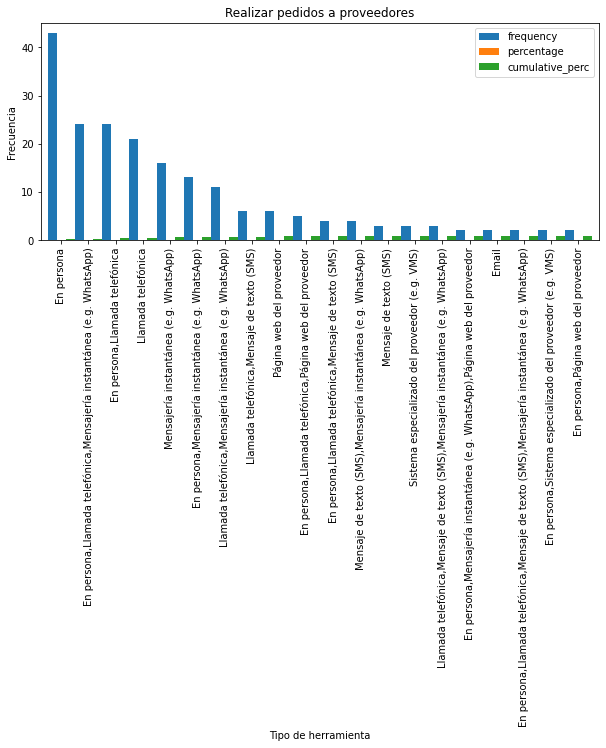

In [ ]:
# Realizamos gráfico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar',width=1, figsize=(10,4))
plt.title('Realizar pedidos a proveedores')
plt.xlabel('Tipo de herramienta')
plt.ylabel('Frecuencia')

Análisis variable 2

In [ ]:
# Obtengo análisis de una variable categórica en específico
table2=freq_tbl(Reto_Retailer['38_average_margin_profits'])
table2

In [ ]:
# Obtengo un filtro de los valores más relevantes de la variable categórica
Filtro2=table2[table2['frequency']>1]
Filtro2

In [ ]:
# Ajusto el índicedel DataFrame
Filtro2_index= Filtro2.set_index('38_average_margin_profits')
Filtro2_index

Text(0, 0.5, 'Frecuencia')

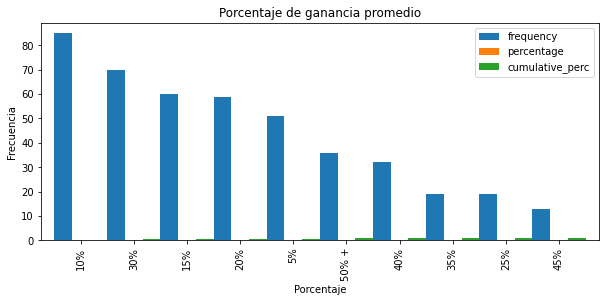

In [ ]:
# Realizamos gráfico de barras del dataframe filtrado
Filtro2_index.plot(kind = 'bar',width=1, figsize=(10,4))
plt.title('Porcentaje de ganancia promedio')
plt.xlabel('Porcentaje')
plt.ylabel('Frecuencia')

Análisis variable 3

In [ ]:
# Obtengo análisis de una variable categórica en específico
table3=freq_tbl(Reto_Retailer['49_inventory_records'])
table3

In [ ]:
# Obtengo un filtro de los valores más relevantes de la variable categórica
Filtro3=table3[table3['frequency']>1]
Filtro3

In [ ]:
# Ajusto el índicedel DataFrame
Filtro3_index= Filtro3.set_index('49_inventory_records')
Filtro3_index

Text(0, 0.5, 'Frecuencia')

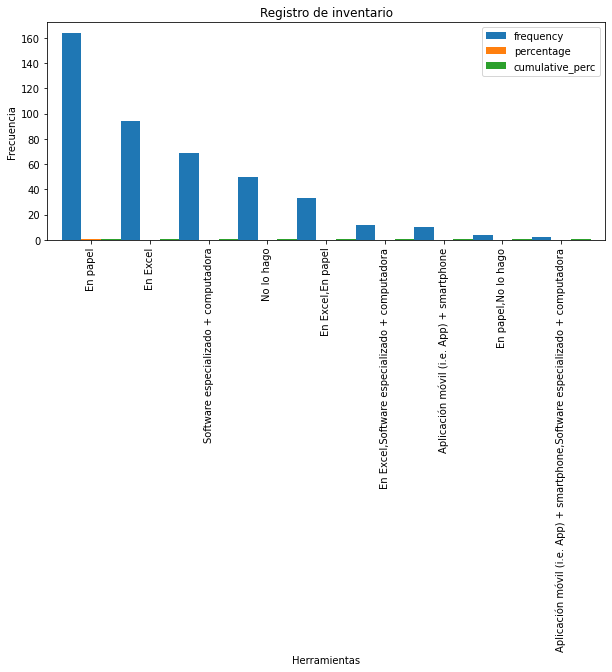

In [ ]:
# Realizamos gráfico de barras del dataframe filtrado
Filtro3_index.plot(kind = 'bar',width=1, figsize=(10,4))
plt.title('Registro de inventario')
plt.xlabel('Herramientas')
plt.ylabel('Frecuencia')

Análisis Variable 4

In [ ]:
# Obtengo análisis de una variable categórica en específico
table4=freq_tbl(Reto_Retailer['184_store_devices'])
table4

In [ ]:
# Obtengo un filtro de los valores más relevantes de la variable categórica
Filtro4=table4[table4['frequency']>1]
Filtro4

In [ ]:
# Ajusto el índicedel DataFrame
Filtro4_index= Filtro4.set_index('184_store_devices')
Filtro4_index

Text(0, 0.5, 'Frecuencia')

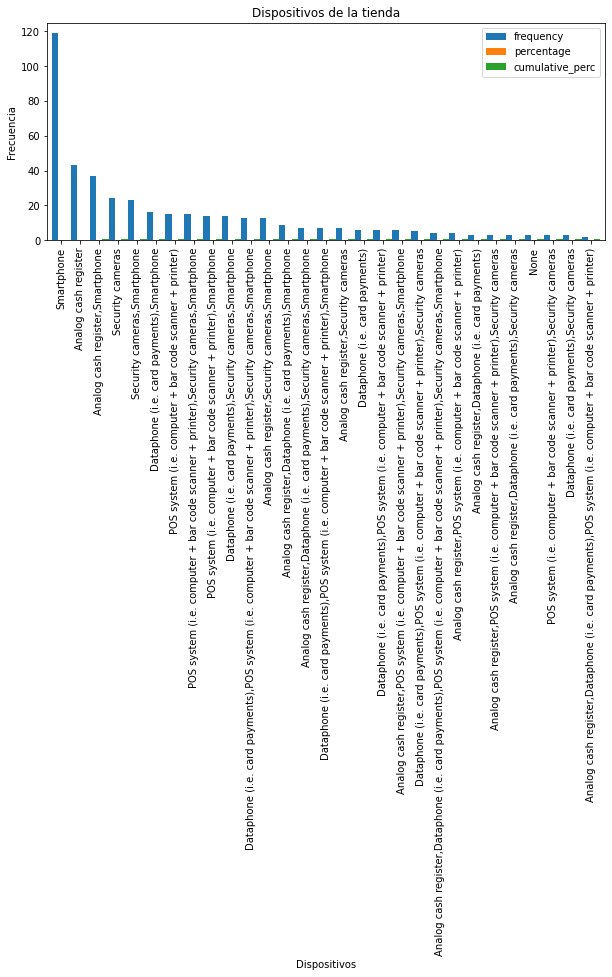

In [56]:
# Realizamos gráfico de barras del dataframe filtrado
Filtro4_index.plot(kind = 'bar',width=1, figsize=(10,4))
plt.title('Dispositivos de la tienda')
plt.xlabel('Dispositivos')
plt.ylabel('Frecuencia')

Análisis variable 5

In [ ]:
# Obtengo análisis de una variable categórica en específico
table5=freq_tbl(Reto_Retailer['6_change_employees_average_salary_last_year'])
table5

In [ ]:
# Obtengo un filtro de los valores más relevantes de la variable categórica
Filtro5=table5[table5['frequency']>1]
Filtro5

In [ ]:
# Ajusto el índicedel DataFrame
Filtro5_index= Filtro5.set_index('6_change_employees_average_salary_last_year')
Filtro5_index

Text(0, 0.5, 'Frecuencia')

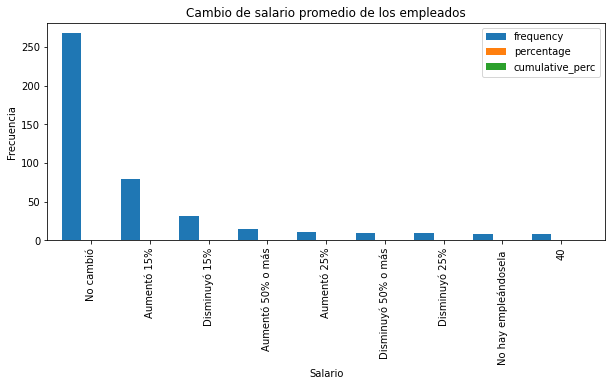

In [61]:
# Realizamos gráfico de barras del dataframe filtrado
Filtro5_index.plot(kind = 'bar',width=1, figsize=(10,4))
plt.title('Cambio de salario promedio de los empleados')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')